In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Add the project root directory to the Python path
sys.path.append(project_root)
# sys.path.append(os.getcwd())

In [2]:
import pandas as pd

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'MAR_per_OAR_for_patients.csv')
df = pd.read_csv(data_file_path)

df['Targ'] = df['MAR'] > 3.5
data = df[['95HD', 'VolDice', 'SurfDist','JaccardIndex', 'APL', 'FNPL', 'FNV', 'Targ', 'OAR', 'patient']]



Config file not found, used a heuristic to define categorical and continuous columns. Please review!
Categorical: ['patient', 'Targ', 'OAR']

Continuous: ['VolDice', 'SurfDist', 'JaccardIndex', 'APL', '95HD', 'FNV', 'FNPL']

Config file not found, checking for outliers in categorical variables...
  - Outliers found in patient: ['RADCURE-3521: 2 out of 380', 'RADCURE-3689: 2 out of 380', 'RADCURE-3929: 2 out of 380', 'RADCURE-3425: 2 out of 380', 'RADCURE-2976: 2 out of 380', 'RADCURE-3698: 2 out of 380']
  - No Outliers found in Targ
  - No Outliers found in OAR
Applying changes from config file...

╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ VolDice, mean (S

KeyboardInterrupt: 

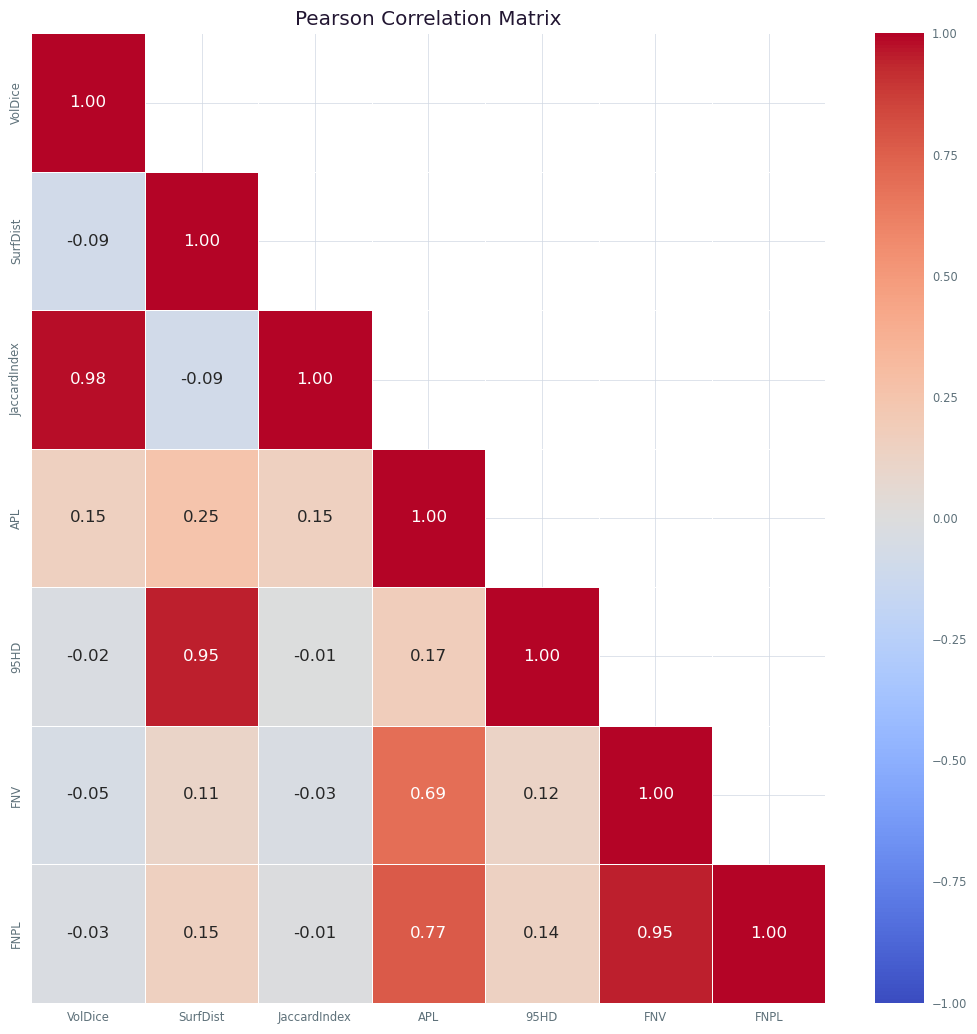

In [3]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./wolnet_MAR/analysis')

analyzer.run()

In [4]:
import yaml
import pprint

with open('./wolnet_MAR/analysis/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print('Config File Before:\n')
pprint.pprint(config)

# Move 'patient' from categorical to other
config['columns']['categorical'].remove('patient')
config['columns']['other'].append('patient')

# Remove 'patient' from mapping
del config['mapping']['patient']

# Remove 'patient' from categorical in missingness_strategy
del config['missingness_strategy']['categorical']['patient']

print('\nConfig File After:\n')
pprint.pprint(config)

with open('./wolnet_MAR/analysis/config.yaml', 'w') as outfile:
    yaml.dump(config, outfile)

Config File Before:

{'columns': {'categorical': ['OAR', 'Targ', 'patient'],
             'continuous': ['APL',
                            'FNPL',
                            '95HD',
                            'SurfDist',
                            'VolDice',
                            'FNV',
                            'JaccardIndex'],
             'date': [],
             'other': []},
 'mapping': {'OAR': {'Acoustic_L': 'Acoustic_L',
                     'Acoustic_R': 'Acoustic_R',
                     'BrachialPlex_L': 'BrachialPlex_L',
                     'BrachialPlex_R': 'BrachialPlex_R',
                     'Brainstem': 'Brainstem',
                     'Esophagus': 'Esophagus',
                     'Eye_L': 'Eye_L',
                     'Eye_R': 'Eye_R',
                     'Larynx': 'Larynx',
                     'Lens_L': 'Lens_L',
                     'Lens_R': 'Lens_R',
                     'Lips': 'Lips',
                     'Mandible_Bone': 'Mandible_Bone',
      

In [5]:
analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./wolnet_MAR/analysis_updated', config_file='./wolnet_MAR/analysis/config.yaml')

analyzer.run()

Applying changes from config file...

╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ APL, mean (SD)          │                │ 0         │ 1995.0 (1895.1) │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ FNPL, mean (SD)         │                │ 0         │ 675.6 (861.7)   │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ 95HD, mean (SD)         │                │ 0         │ 6.2 (21.9)      │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ SurfDist, mean (SD)     │                │ 0         │ 1.3 (1.9)       │
├─────────────────────────┼────────────────┼───────────┼──────

In [6]:
from AutoML.trainer import AutoMLSupervised

trainer = AutoMLSupervised(task='binary', output_dir='./wolnet_MAR/trainer_and_explainer', reduction_method='mrmr')
trainer.run(data, 'Targ', exclude=['OAR', 'patient'], stratify_on='OAR')

Applying mrmr for feature reduction


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 80.97it/s]
No path specified. Models will be saved in: "AutogluonModels/ag-20240821_203520"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #210-Ubuntu SMP Fri Jul 5 17:03:38 UTC 2024
CPU Count:          4
Memory Avail:       0.45 GB / 7.61 GB (5.9%)
Disk Space Avail:   525.48 GB / 915.32 GB (57.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=36

Features kept: ['APL' 'VolDice']


Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240821_203520"
Train Data Rows:    304
Train Data Columns: 2
Label Column:       Targ
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = True, class 0 = False
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    440.14 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtyp


Model Leaderbord
----------------
╒════╤═════════════════════╤═════════════╤═══════════════╕
│    │ model               │   score_val │ eval_metric   │
╞════╪═════════════════════╪═════════════╪═══════════════╡
│  0 │ WeightedEnsemble_L2 │    0.732222 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  1 │ KNeighborsUnif      │    0.708889 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  2 │ RandomForestEntr    │    0.685556 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  3 │ RandomForestGini    │    0.682222 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  4 │ CatBoost            │    0.676667 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  5 │ ExtraTreesEntr      │    0.676667 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  6 │ ExtraTreesGini      │    0.675556 │ roc_auc       │
├────┼───────────────

Computing feature importance via permutation shuffling for 2 features using 76 rows with 5 shuffle sets...
	0.64s	= Expected runtime (0.13s per shuffle set)
	0.26s	= Actual runtime (Completed 5 of 5 shuffle sets)


  0%|          | 0/76 [00:00<?, ?it/s]